# Rotation Curve fitting Tutorial on Advanced Analysis

### Outline


**0.** <a href="#Section0">Get the data, set things up</a>

**1.** <a href="#Section1">Data</a>

**2.** <a href="#Section2">Create moment maps from your cube with gipsy</a>

**3.** <a href="#Section3">Explanation of the script.</a>

**4.** <a href="#Section4">A Simple Rotcur Fit With Gipsy</a>

**5.** <a href="#Section5">Extracting a Position-Velocity Diagram</a>

**6.** <a href="#Section6">Making a Tirific model</a>

**7.** <a href="#Section7">Projection Effects</a>

**8.** <a href="#Section8">Concluding remarks</a>

<a id='Section0'></a>
## 0. Get the data, set things up

In order to get started we first create a directory on the server for this tutorial and subsequently copy this notebook and some example data in there. This can be achieved by typing the following commands:
*  ssh -Y praktikum@192.168.10.231

The password is Monet$

Then create a directory with your name and copy the data (Where [username] should be replaced by a name you choose)

* mkdir [username]
* cd [username]
* cp ../Tutorial/* ./

You now have all the data and there is a file TRM_Tutorial.ipynb
This file is a python notebook and it is what we are going to use in order to do the praktikum.

We are going to run this notebook locally. Type:

* jupyter notebook --no-browser --port= [PORT]

Where you replace [PORT] with a port you want to use. For example 8080 plus your group number (Group 1 uses 8081, Group 2 8082, etc)

Open a second terminal and create a tunnel to the machine we are working on

* ssh -L [PORT]:localhost:[PORT] praktikum@192.168.10.231

Now open the firefox browser on your local machine and navigate to the URL that was listed when you started the note book. (Replace [PORT] again with the port you used).

from your directory select TRM_tutorial.ipynb

From the terminal that you used to create the tunnel you can now start the CARTA fits viewer by typing:
* cd [username]
* carta --no_browser

And navigate to the listed URL in a second window in your browser.

Open one more shell to run work in on the server to work in (by ssh'ing to the server as explained above) and go to your directory. 


<a id='Section1'></a>
## 1. Data

This tutorial on Advanced Analysis uses HI data from the The Westerbork HI Survey of Spiral and Irregular Galaxies (WHISP; [<cite data-cite='2001ASPC..240..451V'>van der Hulst 2001</cite>&#10548;](http://adsabs.harvard.edu/abs/2001ASPC..240..451V)). This sample aimed to map  several hundred nearby spiral and irregular galaxies in HI with the WSRT. The WHISP sample was selected from the Uppsala General Catalogue of Galaxies (UGC, [<cite data-cite='1973ugcg.book.....N'>Nilson 1973</cite>&#10548;](http://adsabs.harvard.edu/abs/1973ugcg.book.....N)), taking all galaxies with declinations north of 20$^{\circ}$, blue major axis diameters larger than 1.5' and measured HI flux densities larger than 100 mJy. The data are available at <a href="http://wow.astron.nl/Westerbork"> Westerbork on the Web (WoW)</a> or <a href="http://www.astro.rug.nl/~whisp/newsite"> the WHISP website</a>. The data cube for this tutorial is distributed with the Tutorial directory.

In the previous section you have copied the HI data cube for NGC 2903 (NGC_2903.fits) to your directory and the corresponding mask that has been created with a source finder program called <a href='https://github.com/SoFiA-Admin/SoFiA'>SoFiA</a> (NGC_2903_mask.fits)

<a id='Section2'></a>
## 2. Create Moment Maps

This Section illustrates how to read the fits file into the Groningen Image Processing System and use the use the gipsy task "MOMENTS" to create moment maps from the data cube. Creating integrated moment maps is straight forward and they are 2D representations of 3D data cubes, as gipsy uses its own file format it is likely easier to write your own code in your favorite coding language that can read fits when you only want to use gipsy for creating moment maps. However, if you want to use some of the many other capabilities within gispy (Radial surface brightness, Rotation Curve Fitting, Mass Modelling, Gauss Fitting) it is advisable to create the maps within gipsy as imported headers can have clashing configurations. 

GIPSY can be run from either an interactive gui but also from the command line. For this tutorial we will first run some tasks from the command line to create a velocity field which we can then use to fit a rotation curve within the gui.

If you have a normal gipsy installation you can run gipsy tasks from the command line with nhermes. This makes it easy to shell script tasks. 

We will use a script to create the moment maps.

have a look at the file read_and_create.sh in your directory

*more read_and_create.sh

This should show you the following lines 

* #!/bin/csh

* nhermes 'RFITS FITSFILE=NGC_2903.fits OUTSET=NGC_2903;'
* nhermes 'RFITS FITSFILE=NGC_2903_mask.fits OUTSET=NGC_2903_mask;'
* nhermes 'CONDIT INSET=NGC_2903  BOX= ; MASKSET=NGC_2903_mask  OUTSET=NGC_2903_masked RGMODE= ; RANGE=0.5 2.0 BLMODE= ; BLOCKVAL= ;'  
* nhermes 'MOMENTS INSET=NGC_2903_masked v BOX= ; OPTION=1 OUTSET=NGC_2903_vel_in AUTO= ; RANGE= ; WINDOW=0'
* nhermes 'DIMINISH INSET=NGC_2903_vel_in s BOX= ; OUTSET=NGC_2903_vel'
* nhermes 'DELETE INSET=NGC_2903_vel_in; OK = Y;'
* nhermes 'EDITSET INSET=NGC_2903_vel EXPRESSION=DATA/1000. ANOTHER=N'
* nhermes 'FIXHED INSET=NGC_2903_vel ITEM=BUNIT; CUNIT1; CUNIT2; CTYPE1; CTYPE2;  VALUE=km/s ; deg; deg; RA---SIN;DEC--SIN;  COMMENT= ; ; ; ; ;'
* nhermes 'FIXHED INSET=NGC_2903_vel ITEM=CUNIT4; CRVAL4; CRVAL3 ;CTYPE3; CDELT 4; CTYPE4; DTYPE4; DRVAL4;DUNIT4; MODE=D ;'
* nhermes 'WFITS INSET=NGC_2903_vel BOX= ; FITSFILE=NGC_2903_vel.fits BITPIX= ;'

Who understands what the script is doing and what the different lines mean?

You can simply run the script (type ./read_and_create.sh in your terminal) to obtain a velocity field from the data. This script only uses gipsy tasks. 

You should now have several new files in your directory with the extensions .descr and .image. These are gipsy image files. We will look at them in <a href="#Section4">Section 4</a>. <a href="#Section3">Section 3</a> explains line by line what the script you have just ran does. If you are interested you can read it. 

Now start the Gipsy GUI by typing 'gipsy' in the terminal. If everything is working correctly this should result in the following display within your terminal.

<img src="GIPSY_001.png">

<a id='Section3'></a>
## 3. Explanation of the script

The first line 

* #!/bin/csh

Simply states that this program should always use the csh shell. This is because bash is often the default but gipsy runs under the c-shell.

The next two line

* nhermes 'RFITS FITSFILE=NGC_2903.fits OUTSET=NGC_2903;'
* nhermes 'RFITS FITSFILE=NGC_2903_mask.fits OUTSET=NGC_2903_mask;'

Read the fits files into gipsy. At the start of this tutorial you have copied two data files into the TRM_tutorial directory. These files are in the fits format however gipsy does not recognize this format. Hence the first two commands are two calls to RFITS to convert the fits files in to gds files that gipsy can read. If this task has run succesfully you should have now three copies of both the data and the mask cube, 1 .fits file, 1 .image file and 1 .descr file. gds files split the header information from the image into separate files and hence a gipsy image or cube always consists of two files.

Once the fits files are succesfully read we use the task CONDIT to mask the noise in the data cube based on the mask created with SoFiA. In the script run here CONDIT transfers all values in the data cube based on the values in the mask. In this case the mask consist of all 1's and outside this region our mask is 0. Hence the range 0.5-2.0 contains all the values in the mask. The output of the task is NGC_2903_masked in which pixels which correspond to 0 in the mask have been blanked and where the mask is in the 0.5-2.0 the values are taken from the data cube.

This is done with the line

* nhermes 'CONDIT INSET=NGC_2903  BOX= ; MASKSET=NGC_2903_mask  OUTSET=NGC_2903_masked RGMODE= ; RANGE=0.5 2.0 BLMODE= ; BLOCKVAL= ;'

The next line 

* nhermes 'MOMENTS INSET=NGC_2903_masked v BOX= ; OPTION=1 OUTSET=NGC_2903_vel_in AUTO= ; RANGE= ; WINDOW=0'

calls the task MOMENTS to create an intensity weighted velocity field (moment 1) from the masked data cube. You could set option to 0 to get an integrated intensity map (moment 0) which is in principle an image of all the gas in the galaxy. Or use option = 2 to get a map of the linewidths in the data cube.

Gipsy keeps the third axis so we remove that.

* nhermes 'DIMINISH INSET=NGC_2903_vel_in s BOX= ; OUTSET=NGC_2903_vel'
* nhermes 'DELETE INSET=NGC_2903_vel_in; OK = Y;'

Finally we edit the velocity field to be in km/s as otherwise we continuously are looking at large values.  And remove redundant header values.

* nhermes 'EDITSET INSET=NGC_2903_vel EXPRESSION=DATA/1000. ANOTHER=N'
* nhermes 'FIXHED INSET=NGC_2903_vel ITEM=BUNIT; CUNIT1; CUNIT2; CTYPE1; CTYPE2;  VALUE=km/s ; deg; deg; RA---SIN;DEC--SIN;  COMMENT= ; ; ; ; ;'
* nhermes 'FIXHED INSET=NGC_2903_vel ITEM=CUNIT4; CRVAL4; CRVAL3 ;CTYPE3; CDELT 4; CTYPE4; DTYPE4; DRVAL4;DUNIT4; MODE=D ;'

And write the gipsy file to a fits file as Carta does not know the GIPSY format.
* nhermes 'WFITS INSET=NGC_2903_vel BOX= ; FITSFILE=NGC_2903_vel.fits BITPIX= ;'


<a id='Section4'></a>
## 4. A Simple Rotcur Fit With Gipsy

In Section 2 you have created an intensity weighted moment 1 map from the data cube (The map is in NGC_2903_vel). The first step in any analysis is always to inspect the data you are going to use. Kvis can be used to inspect gds files as well as viewers inside Gipsy itself. However as we are working remotely we will use the CARTA viewer which only accepts the fits files. Click on the browser window with CARTA and open the file NGC_2903_vel.fits

Your velocity field in CARTA should look like the following image after zooming in. 

<img src="CARTA_1.png">

We will now use the gui to make an initial tilted ring model. When used in the GUI mode gipsy will ask all the required input. We will go through an initial fit input by input. If you have not yet done so start the GUI by typing gipsy in the command line.

To begin type *rotcur* into the GUI.

It will first ask for the 'INSET=' this is the data set that rotcur will work on and in our case it will be the previously created velocity  field.

INSET=NGC_2903_vel

Next it will ask for the BOX=. This keyword will allow you to select a subset of the inset image. In our case we want to use the whole image and we can just use the default.

Now rotcur will require some input to define the tilted ring model. The first input is the RADII. In order to define the radii we need two parameters, the ring width and the total extent of the model. Generally we want our rings to be independent and therefore we use a ring width equal to the major axis FWHM of the synthesised beam. This parameter is normally recorded in the header of the file in the BMMAJ keyword of the fits file. In our data set we have a FWHM of 57.41 arcsec. The extent of the model is fully galaxy dependent and we will have to estimate it from our velocity field. We will start with a radius of 600 arcsec. You can later on decide wether this is too extended or too small.

RADII=30:600:60

WIDTHS=60.

Then it will ask for the systemic velocity of the model. To estimate we go to CARTA again and look for the velocity that corresponds to the centre of the values in the map (See the black circles in the image). 

<img src="CARTA_2.png">

VSYS = xxx

As we will assume that the systemic is the same for every ring we will only provide a single number. This is not required we could have different values for each ring.

Next up we need to provide rotcur with an initial rotation curve. Once more we will get an initial estimate from the velocity field. We go back to CARTA and estimate the the maximum and minimum velocity in the map. The difference of these with the systemic velocity gives us the observed maximum rotational velocity.

<img src="CARTA_3.png">

So we get ((v$_{max}$-v$_{sys}$)+(v$_{sys}$-v$_{min}$))/2.=v$_{obs}$. After this we also need a inclination as v$_{obs}$=v$_{rot}\times$sin(i). In this case the inclination from the galaxy appears to be $\sim$ to 65$^{\circ}$ and hence our vrot becomes v$_{obs}$/sin(65). We will assume a constant rotation curve as an initial estimate. As gipsy expects various numbers it will ask again for VROT after the first input. Leave this blank to provide a single value for all rings.

VROT= xxx

VROT= 

Then is the VEXP of each ring. These are the radial motions present in the velocity field. In general these are minor and hence we set our initial guess to 0 which is the default in Gipsy so we can just press enter.

VEXP= 

The position angle (PA) of the galaxy is the angle between north and the major axis on the receding side of the galaxy, counter clockwise. In general spiral galaxies can be well described by circles that are inclined compared to the sky. This is the whole premise of a tilted ring model. Hence, you can imagine drawing ellipses on top of the velocity field. The longest axis you can draw on these ellipses is the major axis. The receding side is the side which is moving away from and thus the one with the highest velocities in the map. Now estimate the overall PA from the map, remember counter clockwise!!!

PA= xxx

PA= 

The inclination of a galaxy is the angle between the plane of the sky and the plane of the disk. This can be estimated by deprojecting the imaginary ellipses back to circles. When they are already circles the inclination = 0 and when you can only see the edge of the disk the inclination = 90, these are the minimum and maximum values of the inclination. In the example the inclination is around 65 deg.

INCL= 65

INCL=

Next up is the centre of the galaxy. This number can be given in pixels or degrees and should consist of two values. One for RA and one for DEC. It is easy to estimate the pixel values from our velocity field. It should be the pixels from which you read your systemic velocity. As these three values define the center of the galaxy they should all fall in the same resolution element. However, gipsy and CARTA use different pixels axes, in CARTA the pixels are counted from the bottom right corner, in gipsy they are counted from the pixels which are defined in the header to have a RA and DEC value. From these pixels the WCS coordinate system is build up in both CARTA and gipsy. This means that your x and y values in CARTA need to be modified to gipsy values. The change you need is printed by gipsy when reading the velocity field (Use ctrl-z to go up and ctrl-v to go down in your gipsy history). In this case the pixels are x$_{gipsy}$=x$_{carta}$-128 and y$_{gipsy}$=y$_{carta}$-128

CENTRE = xxx xxx

As we are measuring the doppler shift along the line of sight we are insensitive to motions in the plane of the sky. Around the minor axis the rotation is exactly in this direction and hence it carries no information about the rotation of the galaxy. The closer you get to the minor axis the worse this effect gets. Therefore rotcur gives the option to exclude an angle around the minor axis. Typically a value between 10-20 is chosen.

FREEANGLE= xxx

Gipsy also gives the option to fit full circles or to fit the approaching and the receding side of the galaxy independently. We first want to fit both sides as one fit, this is the default and thus we can just press enter.

SIDE = 

As discussed before, some parts of the velocity field carry more information about the rotation then other part. In rotcur we can therefore weight the pixels with three different weighting functions. The UNIFORM weighting function, were all points in a ring have equal weights, the [COSINE] weighting function, were each point in a ring is weighted with |cos(theta)|, and the COS-SQUARED weighting function, were each point is weighted with cos(theta)^2. For this tutorial we will only use the default which is the COSINE weighting function. This is once more the default and thus.

WEIGHT=

The next parameter is one of the most important parameters in rotcur. It enables us to decide which parameters we want to fix and which one we want to fit. As we are all excellent researchers convinced that our initial estimates are almost correct we will first not fix anything.


FIXED=

Finally rotcur will ask you for a filename to store the output.
FILENAME=my_first_fit.rotcur

You have now fitted the rotation curve. Now open the file my_first_fit.rotcur and look at the values. It is likely that they show quite some scatter. By running the cell below we can plot rotation curve as well as the pa and inclination. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
rad,width,vsys,vsys_err,vrot,vrot_err,vexp,vexp_err,pa,pa_err,incl,incl_err,x,x_err,y,y_err,npts,sig=np.loadtxt('my_first_fit.rotcur', skiprows=11, unpack=True)
plt.figure(1,figsize=(10,15))
plt.subplot(7,1,1)
plt.scatter(rad, vrot)
plt.errorbar(rad,vrot,xerr=0,yerr=vrot_err)
plt.ylabel('VROT (km/s)')
plt.subplot(7,1,2)
plt.scatter(rad, pa)
plt.errorbar(rad, pa,xerr=0,yerr=pa_err)
plt.ylabel('PA (degrees)')
plt.subplot(7,1,3)
plt.scatter(rad, incl)
plt.errorbar(rad, incl,xerr=0,yerr=incl_err)
plt.ylabel('Inclination (degrees)')
plt.subplot(7,1,4)
plt.scatter(rad, vsys)
plt.errorbar(rad, vsys,xerr=0,yerr=vsys_err)
plt.ylabel('VSYS (km/s)')
plt.subplot(7,1,5)
plt.scatter(rad, x)
plt.errorbar(rad, x,xerr=0,yerr=x_err)
plt.ylabel('XPOS (pix)')
plt.subplot(7,1,6)
plt.scatter(rad, y)
plt.errorbar(rad, y,xerr=0,yerr=x_err)
plt.ylabel('YPOS (pix)')
plt.subplot(7,1,7)
plt.scatter(rad, vexp)
plt.errorbar(rad, vexp,xerr=0,yerr=vexp_err)
plt.ylabel('Vexp (km/s)')
plt.xlabel('Radius (arcsec)')

plt.show()
print('Mean Vsys = {}+/- {}'.format(np.mean(vsys),np.std(vsys)))
print('Mean XPOS = {}+/- {}'.format(np.mean(x),np.std(x)))
print('Mean YPOS = {}+/- {}'.format(np.mean(y),np.std(y)))

OSError: my_first_fit.rotcur not found.

From the first run you likely get a rotation curve and warp that do not look to smooth. It can have outliers and the first point should be close to zero. Additionally we do not really expect radial velocities but we have fitted them.

So lets try to improve the fit. Under the figure we just produced we have printed the mean values for the central coordinates in our fit, note that the spatial coordinates are in pixels. We can use these to improve our fit by fixing the center and the radial velocities and fit only the rotation curve, PA and inclination. Let's try this and see if this improves or deteriorates the parameters. 

As we have already run rotcur gipsy remembers our values and we can edit them within gipsy. By adding an exclamation mark in front of the task you can tell gipsy to use the last input.

In the gipsy gui type first *!rotcur* but do not yet press enter, instead type ESC-e (yes the escape button) 

This should open the available editor (In our case this is vim) and here we can modify the input parameters.

Now modify the FIXED keyword (type i to edit the file, press ESC to exit editing and the :wq to save and quit) such that the central position is fixed we will not fit radial velocities either.

FIXED = VSYS XPOS YPOS VEXP

Also change the name of the output file

FILENAME=my_second_fit.rotcur

And modify CENTRE and VSYS to the mean values of the previous fit.

Now save the file and exit the editor. On the server we run vim as the editor and you exit and save with :wq 
Now press enter.
Run the cell below to compare your results. The results should now have a bit smoother variations.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
rad,width,vsys,vsys_err,vrot,vrot_err,vexp,vexp_err,pa,pa_err,incl,incl_err,x,x_err,y,y_err,npts,sig=np.loadtxt('my_first_fit.rotcur', skiprows=11, unpack=True)
rad2,width2,vsys2,vsys_err2,vrot2,vrot_err2,vexp2,vexp_err2,pa2,pa_err2,incl2,incl_err2,x2,x_err2,y2,y_err2,npts2,sig=np.loadtxt('my_second_fit.rotcur', skiprows=11, unpack=True)
plt.figure(1,figsize=(10,15))
plt.subplot(7,1,1)
plt.scatter(rad, vrot)
plt.errorbar(rad,vrot,xerr=0,yerr=vrot_err)
plt.scatter(rad2, vrot2)
plt.errorbar(rad2,vrot2,xerr=0,yerr=vrot_err2)
plt.ylabel('VROT (km/s)')
plt.subplot(7,1,2)
plt.scatter(rad, pa)
plt.errorbar(rad, pa,xerr=0,yerr=pa_err)
plt.scatter(rad2, pa2)
plt.errorbar(rad2, pa2,xerr=0,yerr=pa_err2)
plt.ylabel('PA (degrees)')
plt.subplot(7,1,3)
plt.scatter(rad, incl)
plt.errorbar(rad, incl,xerr=0,yerr=incl_err)
plt.scatter(rad2, incl2)
plt.errorbar(rad2, incl2,xerr=0,yerr=incl_err2)
plt.ylabel('Inclination (degrees)')
plt.subplot(7,1,4)
plt.scatter(rad, vsys)
plt.errorbar(rad, vsys,xerr=0,yerr=vsys_err)
plt.scatter(rad2, vsys2)
plt.errorbar(rad2, vsys2,xerr=0,yerr=vsys_err2)
plt.ylabel('VSYS (km/s)')
plt.subplot(7,1,5)
plt.scatter(rad, x)
plt.errorbar(rad, x,xerr=0,yerr=x_err)
plt.scatter(rad2, x2)
plt.errorbar(rad2, x2,xerr=0,yerr=x_err2)
plt.ylabel('XPOS (pix)')
plt.subplot(7,1,6)
plt.scatter(rad, y)
plt.errorbar(rad, y,xerr=0,yerr=x_err)
plt.scatter(rad2, y2)
plt.errorbar(rad2, y2,xerr=0,yerr=x_err2)
plt.ylabel('YPOS (pix)')
plt.subplot(7,1,7)
plt.scatter(rad, vexp)
plt.errorbar(rad, vexp,xerr=0,yerr=vexp_err)
plt.scatter(rad2, vexp2)
plt.errorbar(rad2, vexp2,xerr=0,yerr=vexp_err2)
plt.ylabel('Vexp (km/s)')
plt.xlabel('Radius (arcsec)')

plt.show()


OSError: my_first_fit.rotcur not found.

So depending on how well you know the central coordinates, a typical rotcur fit would start with the center (XPOS, YPOS, VSYS) fixed or all parameters free, then do a run where vsys is also fitted to ensure that it was chosen properly, a run with the new center fixed, if vsys changed a lot an average of the previous fit would be the new value, and then a final run where only vrot is fitted. Before the final run usually the PA and inclination are slightly smoothed. Finally some researchers will do a final run with all parameters free. Whether a final rotation curve is a good fit is often a somewhat subjective assesment.

The next section will explain how to compare your rotation curve to the data.

<a id='Section5'></a>
## 5. Extracting a Position-Velocity Diagram

One very good way to evaluate your rotation curve is to overplot it on a PV diagram along the major axis. Change the filename in the next cell to your latest rotcur run and then let python plot the rotation curve on top of the PV-Diagram extracted along the average PA.

In [3]:
import sys  
!{sys.executable} -m pip install scipy
%matplotlib inline
Filename='my_second_fit.rotcur'
import matplotlib.pyplot as plt
import numpy as np
from astropy import wcs
from astropy.io import fits
from scipy import ndimage
def rotateCube(Cube, angle, pivot):
    padX = [int(Cube.shape[2] - pivot[0]),int(pivot[0])]
    padY = [int(Cube.shape[1] - pivot[1]), int(pivot[1])]
    imgP = np.pad(Cube, [[0, 0],padY, padX], 'constant')
    imgR = ndimage.rotate(imgP, angle, axes=(2,1), reshape=False)
    return imgR[:, padY[0] : -padY[1], padX[0] : -padX[1]]

def plot_fits(filetoplot,figure,contours=None, figure_coordinates=[0.1,0.1,0.8,0.8],cmap='jet',log=False,aspect=None):
    hdu = fits.open(filetoplot)[0]
    plt.rc('xtick', color='k', labelsize='medium', direction='in')
    plt.rc('ytick', color='k', labelsize='medium', direction='in')
    space=figure_coordinates[2]*7.5
    wcsfound=False
    try:
        wcs = WCS(hdu.header)
        fitsplt = figure.add_axes(figure_coordinates,projection=wcs)
        wcsfound=True
    except:
        fitsplt = figure.add_axes(figure_coordinates)
        xaxis=[hdu.header['CRVAL1']+(i-hdu.header['CRPIX1']+1)*(hdu.header['CDELT1']) for i in range(hdu.header['NAXIS1'])]
        yaxis=[hdu.header['CRVAL2']+(i-hdu.header['CRPIX2']+1)*(hdu.header['CDELT2']) for i in range(hdu.header['NAXIS2'])]
         
    # we have to check for nan blanks and set them to 0
    tmp = np.isnan(hdu.data)
    nonzero= np.array(np.where(tmp == True))

    if nonzero.shape[1] < 1:
        nonzero= np.array(hdu.data[np.where(hdu.data != 0)])
    else:
        nonzero= np.array(hdu.data[np.where(tmp == False)]) 
    mini = np.min(nonzero)
    counter=0
    while np.array(np.where(nonzero < mini)[0]).shape[0] < nonzero.shape[0]/10.:
        mini = mini+abs(mini/10.)
        counter += 1
        if counter > 100:
            break
    counter=0
    maxi = np.max(nonzero)
    while np.array(np.where(nonzero > maxi)[0]).shape[0] < nonzero.shape[0]/200.:
        maxi = maxi-abs(maxi/50.)
        counter += 1
        if counter >100:
            break

   
    if log:
        if mini < 0:
            print('Why are we not adjusting?')
            rows,cols=np.where(hdu.data > 1e-3)
            newarray=hdu.data[rows,cols]
            mini = np.min(newarray)
            counter=0
            while np.array(np.where(newarray < mini)[0]).shape[0] < newarray.shape[0]/10.:
                mini = mini+abs(mini/10.)
                counter += 1
                if counter > 100:
                    break
        else:
            newarray=hdu.data
        print(mini)
       
        i = fitsplt.imshow(hdu.data, origin='lower',cmap=cmap,norm=colors.LogNorm(vmin=mini, vmax=maxi),aspect=aspect)

    else:
        i = fitsplt.imshow(hdu.data, origin='lower',cmap=cmap,vmin=mini, vmax=maxi,aspect=aspect)
    try: 
        cbar = figure.colorbar(i)
    except:
        pass
    if wcsfound:
        ra = fitsplt.coords[0]
        ra.set_major_formatter('hh:mm:ss')
        ra.set_ticks(number=round(space))
    else:
        plt.gca().set_xticks(range(len(xaxis))[0:-1:int(len(xaxis)/5)])
        plt.gca().set_yticks(range(len(yaxis))[0:-1:int(len(yaxis)/5)])
        plt.gca().set_xticklabels(['{:10.0f}'.format(i) for i in xaxis[0:-1:int(len(xaxis)/5)]])
        plt.gca().set_yticklabels(['{:10.1f}'.format(i) for i in yaxis[0:-1:int(len(yaxis)/5)]])
    fitsplt.set_xlabel(hdu.header['CTYPE1'])
    fitsplt.set_ylabel(hdu.header['CTYPE2'])
    if log:
        levels=[1E20, 2E20, 4E20, 8E20,16E20,32E20]
        try:
            beam=[hdu.header['BMAJ']*3600.,hdu.header['BMIN']*3600.]
        except:
            beam=[1.,1.]
        levels = columndensity(levels,vwidth=1,beam=beam,ncolumn=True)/1000.
    else:
        if mini > 0:
            maxvrot=(maxi-mini)/2.
            velostep=int(((int(maxi-mini)-int(maxi-mini)/10.)/10.)*1.5)
            levels=[(i)*velostep+mini for i in range(15)]
 
        else:
            
            sig1=np.std(hdu.data[0:10,-10:-1])
            sig2=np.std(hdu.data[0:10,0:10])
            sig3=np.std(hdu.data[-10:-1,-10:-1])
            sig4=np.std(hdu.data[-10:-1,0:10])
            sig = np.mean([sig1,sig2,sig3,sig4])
            if np.isnan(sig):
                sig=abs(mini)/3.
            while sig > maxi:
                sig =sig/2.
            levels=np.array([-2,-1,1,2,4,8,16,32,64,128])*1.5*sig

    contourdata = fitsplt.contour(hdu.data, levels, colors='k', origin='lower',linewidths=0.75)
    if contours:
       
        hdumod = fits.open(contours)[0]
        if mini < 0:
            contour = fitsplt.contour(hdumod.data, levels, colors='r', origin='lower')
        else:
            try:
                contour = fitsplt.contour(hdumod.data, levels, colors='w', origin='lower')
            except UserWarning:
                contour = fitsplt.contour(hdumod.data, levels/2., colors='w', origin='lower')

rad,width,vsys,vsys_err,vrot,vrot_err,vexp,vexp_err,pa,pa_err,incl,incl_err,x,x_err,y,y_err,npts,sig=np.loadtxt(Filename, skiprows=11, unpack=True)
avgpa=np.mean(pa)
print("The average PA is {}".format(np.mean(pa)))
print("Extracting the PV-Diagram")

#First read in the Cube
hdulist = fits.open("NGC_2903.fits")
cube= hdulist[0].data
nz, ny, nx = cube.shape
# Let's get the average declination center+CRPIX2
#Let's translate the other values to pixels as well
avgypos=int(np.mean(y)+hdulist[0].header['CRPIX2']+1)
avgxpos=int(np.mean(x)+hdulist[0].header['CRPIX1']+1)

nextcube= rotateCube(cube ,avgpa-90+180, [avgxpos,avgypos] )
#Let's slice out the PV-Diagram
sliced = np.zeros((nz,nx-150),dtype=float)

sliced=nextcube[:,avgypos,75:-75]

avgvsys=int((np.mean(vsys)-hdulist[0].header['CRVAL3'])/hdulist[0].header['CDELT3']+hdulist[0].header['CRPIX3']+1)
#then lets write this to a fitsfile
hdr = hdulist[0].header
# As python is stupid making a simple copy will mean that these changes are still applied to hudulist 
hdr['NAXIS2'] = nz
hdr['CRPIX2'] = hdulist[0].header['CRPIX3']
hdr['CRVAL2'] = hdulist[0].header['CRVAL3']
hdr['CDELT2'] = hdulist[0].header['CDELT3']
hdr['CTYPE2'] = hdulist[0].header['CTYPE3']
hdr['CUNIT2'] = hdulist[0].header['CUNIT3']
del(hdr['CRPIX3'])
del(hdr['CRVAL3'])
del(hdr['CDELT3'])
del(hdr['CTYPE3'])
del(hdr['CUNIT3'])
del(hdr['NAXIS3'])
hdr['NAXIS1'] = nx-150
hdr['CRPIX1'] = avgxpos-75
hdr['CRVAL1'] = 0.
hdr['CDELT1'] = abs(hdulist[0].header['CDELT1']*3600.)
hdr['CTYPE1'] = 'OFFSET'
hdr['CUNIT1'] = 'ARCSEC'
fits.writeto('xv_diagram.fits',sliced,header=hdr,overwrite=True)

# Then we want to plot our PV-Diagram
print("Plotting")
PVDiagram = plt.figure(2, figsize=(6, 4), dpi=300, facecolor='w', edgecolor='k')

plot_fits('xv_diagram.fits',PVDiagram,cmap='hot_r',aspect='auto',figure_coordinates=[0.1,0.1,0.5,0.5])
       
#now we need to plot our extracted slice
#plt.imshow(sliced[:,75:175], origin="lower", cmap="jet", interpolation="nearest")
plt.xlabel("Offset (arcsec)")
plt.ylabel("Velocity (KM/S)")

xlimit = plt.xlim()
ylimit= plt.ylim()
#translate our  radius and velocity to pixel coordinates
radp=rad/(hdulist[0].header['CDELT1'])
#The center of the galaxy needs to be added and 75 needs to be subtracted as we do no plot the full cube
avgxpos=int(np.mean(x)+hdulist[0].header['CRPIX1']+1)
radp=radp+hdr['CRPIX1']
#Translate the rotation to pixels
vrotp=vrot/(hdulist[0].header['CDELT2'])
#vrot needs to be mulitplied with sin(i)
vrotp = vrotp*np.sin(incl* np.pi/180.)
# And the center needs to be added in pixels
vrotp= vrotp+avgvsys
#and plot them
plt.scatter(radp, vrotp,color='blue',zorder=10)
plt.errorbar(radp,vrotp,xerr=0,yerr=vrot_err,color='blue',zorder=10)
#Also on the other side
radp=rad/(hdulist[0].header['CDELT1'])
radp=((-1*radp)+hdr['CRPIX1'])
#And the rotation
vrotp=vrot/(hdulist[0].header['CDELT2'])
#vrot needs to be mulitplied with sin(i)
vrotp = vrotp*np.sin(incl* np.pi/180.)
# And the center needs to be added in pixels
avgvsys=int((np.mean(vsys)-hdulist[0].header['CRVAL2'])/hdulist[0].header['CDELT2']+hdulist[0].header['CRPIX2']+1)
vrotp= (-1*vrotp)+avgvsys
#and plot them
plt.scatter(radp, vrotp,color='blue',zorder=10)
plt.errorbar(radp,vrotp,xerr=0,yerr=vrot_err,color='blue',zorder=10)
plt.scatter(hdr['CRPIX1'], avgvsys,color='red',zorder=10)
plt.xlim(xlimit)
plt.ylim(ylimit)
plt.show()


You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.1.9/libexec/bin/python3.9 -m pip install --upgrade pip' command.


OSError: my_second_fit.rotcur not found.

Try to make the rotation curve as good as you can by varying your initial guesses and guiding the fits.

Another way to compare your model to the data is to create a mock data cube of the parameters you have found. This can be done with the task galmod in gipsy or with the 3D fitting software <a href="http://gigjozsa.github.io/tirific/">tirific</a>. Now close gipsy by typing exit in the GUI.

<a id='Section6'></a>
## 6. Making a Tirific Model

Rotcur uses a velocity field to fit the tilted ring model. However, the velocity field should not be used when the galaxy is inclined too much or too little in the plane of the sky. Additionally beam smearing and other projection effects can confuse the extraction of the parameters from the velocity field. In these cases it might be necessary to fit the datacube directly. We are going to experiment a little with such 3D models and projection effects with <a href="http://gigjozsa.github.io/tirific/">tirific</a>.

When we copied the initial directory we also obtained a def file which is the input for tirific. If you did not manage a decent fit with rotcur, the initial conditions in this file are a good guess. However, in this tutorial we will not use tirific to do fitting but merely to create models such that we get a better feel for how the parameters relate to the emission in the data cube. Now use a text editor to open the file 1stfit.def. This file contains a lot of parameters that relate to how to run tirific efficiently. The most inportant parameters are those that describe the disk geometry. Most of these are the same as in rotcur (i.e. XPOS, YPOS, VSYS, VROT, RADI), but as this is 3D fitting we need additional parameters to construct a model and create a mock data cube. These are the surface brightness (SBR), scale height (Z0) and dispersion (SDIS). With these parameters we can now produce a simple model that descibes the galaxy we are trying to fit. As 3D fitting is computationallly expensive it is important to use a cube that is as small as possible when actaually fitting. This usually means a cube that entxends several channels beyond the emission in velocity and 1-2 resolution elements in spatial size.

Now we will create our first mock data cube:

* tirific DEFFILE=1stfit.def

There should now be an additional fits file in your directory called 1stfit.fits. This is the model of a flat disk, i.e. no warp, at an inclination of 60$^{\circ}$. Now load the model cube into CARTA and go through the data cube yourself with the data cube. Do you recognise the butterfly wings opening up as you move through the channel maps? By creating model data cubes we can gain a lot better understanding of different effects of orientation and how they affect our observations. 


<a id='Section7'></a>
## 7. Projection Effects

In this section we will use tirific to get a better understanding of the projection effects in HI observations. Open the def file proj.def with your editor. This file is the same as the 1stfit.def except that we changed the filenames for the output. Now change the  INCL parameter to 90 and run tirific again.

* tirific DEFFILE=proj.def 

Load the file into CARTA and have a look at how the distribution of the emission has changed. If you have made the model in the correct way the emission should now move through the cube as a single line along the  major axis. If we extract the PV-Diagram along the major axis we can now see that, instead of an image with a nicely defined distribution along the rotation curve as in section 4, that the emission has long tails towards the systemic velocity. These tails get worse the closer we get to the center of the galaxy as we observe more and more motion that is mostly in the plane of the sky.

Run the cell below to extract the PV-Diagram

The average PA is 24.685000000000002
Extracting the PV-Diagram
No units
Plotting
[-111.57382987 -147.38118443 -161.65870309 -150.03632592 -164.75535686
 -171.74020405 -170.71983047 -168.49917884 -166.84967791 -163.64659066] 553.7
This is  our average vsys 553.7
This is the radii [37.79213149 39.9363946  42.08065771 44.22492083 46.36918394 48.51344705
 50.65771016 52.80197327 54.94623639 57.0904995 ]
These are the velocities [33.98368509 25.3133989  21.85628306 24.67049085 21.10646854 19.41517844
 19.66224866 20.19995064 20.59935588 21.37494188]
This is the radii [35.64786838 33.50360527 31.35934215 29.21507904 27.07081593 24.92655282
 22.78228971 20.63802659 18.49376348 16.34950037]
These are the velocities [ 88.01599481  96.68628099 100.14339684  97.32918905 100.89321136
 102.58450145 102.33743123 101.79972926 101.40032402 100.62473801]


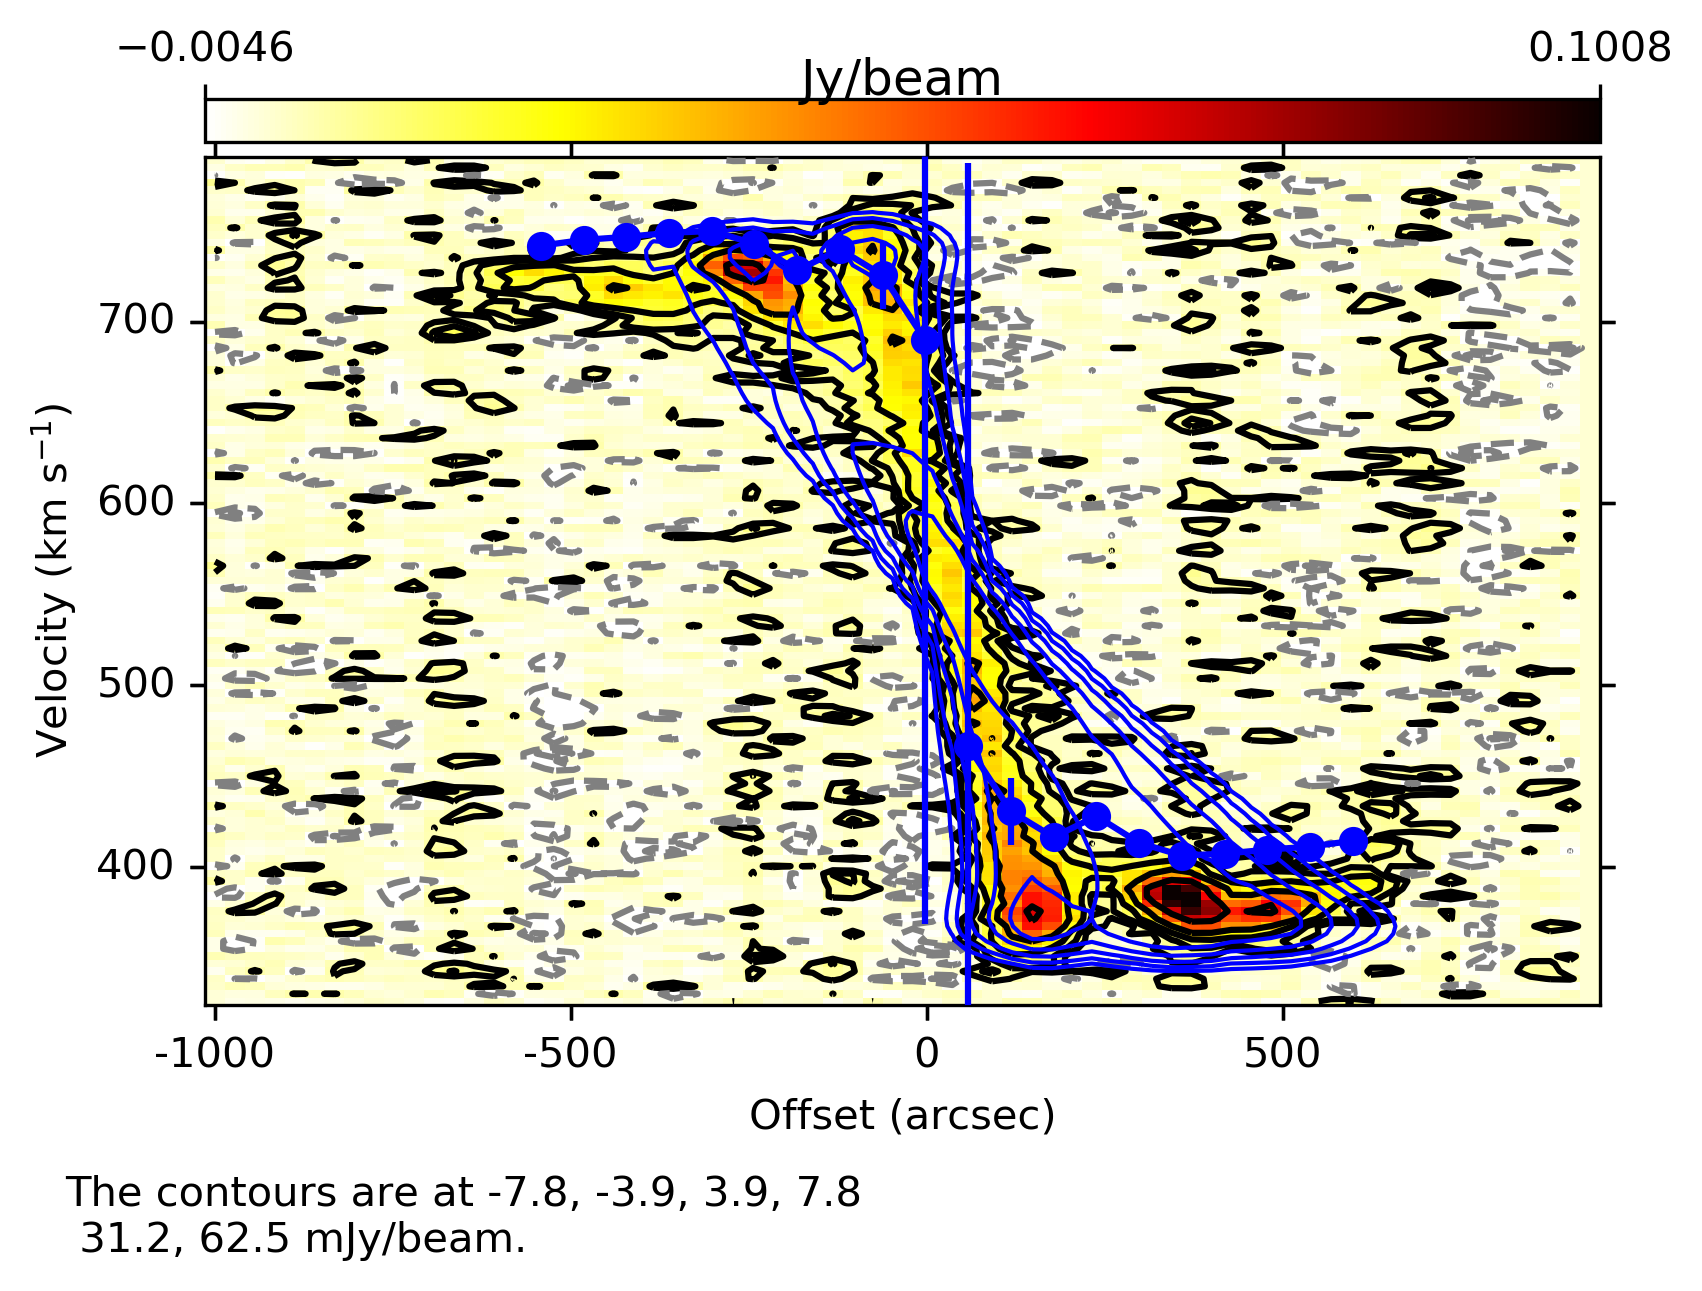

In [4]:
%matplotlib inline
Filename='my_second_fit.rotcur'
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    import matplotlib
    #matplotlib.use('png')
    import matplotlib.pyplot as plt
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    from matplotlib.patches import Ellipse
    import matplotlib.axes as maxes
import numpy as np
import copy
from astropy.wcs import WCS
from astropy.io import fits
from scipy import ndimage


def obtain_border_pix(hdr,angle,center, debug = False):
    rotate = False
    # only setup for 0-180 but 180.-360 is the same but -180
    if angle > 180.:
        angle -= 180.
        rotate = True

    if angle < 90.:
        x1 = center[0]-(hdr['NAXIS2']-center[1])*np.tan(np.radians(angle))
        x2 = center[0]+(center[1])*np.tan(np.radians(angle))
        if x1 < 0:
            x1 = 0
            y1 = center[1]+(center[0])*np.tan(np.radians(90-angle))
        else:
            y1 = hdr['NAXIS2']
        if x2 > hdr['NAXIS1']:
            x2 = hdr['NAXIS1']
            y2 = center[1]-(center[0])*np.tan(np.radians(90-angle))
        else:
            y2 = 0
    elif angle == 90:
        x1 = 0 ; y1 = center[1] ; x2 = hdr['NAXIS1'] ; y2 = center[1]
    else:
        x1 = center[0]-(center[1])*np.tan(np.radians(180.-angle))
        x2 = center[0]+(hdr['NAXIS2']-center[1])*np.tan(np.radians(180-angle))
        if x1 < 0:
            x1 = 0
            y1 = center[1]-(center[0])*np.tan(np.radians(angle-90))
        else:
            y1 = 0
        if x2 > hdr['NAXIS1']:
            x2 = hdr['NAXIS1']
            y2 = center[1]+(center[0])*np.tan(np.radians(angle-90))
        else:
            y2 = hdr['NAXIS2']
    # if the orginal angle was > 180 we need to give the line 180 deg rotation
    x = [x1,x2]
    y = [y1,y2]
    if rotate:
        x.reverse()
        y.reverse()
    return (*x,*y)

def extract_pv(cube_in,angle,center=[-1,-1,-1],finalsize=[-1,-1],convert=-1, debug = False):
    
    if debug:
        print(f'''EXTRACT_PV: We are the extraction of a PV-Diagram
{'':8s} PA = {angle}
{'':8s} center = {center}
{'':8s} finalsize = {finalsize}
{'':8s} convert = {convert}''')


    cube = copy.deepcopy(cube_in)
    hdr = copy.deepcopy(cube[0].header)
    TwoD_hdr= copy.deepcopy(cube[0].header)
    data = copy.deepcopy(cube[0].data)
    #Because astro py is even dumber than Python
    try:
        if hdr['CUNIT3'].lower() == 'km/s':
            hdr['CUNIT3'] = 'm/s'
            hdr['CDELT3'] = hdr['CDELT3']*1000.
            hdr['CRVAL3'] = hdr['CRVAL3']*1000.
        elif hdr['CUNIT3'].lower() == 'm/s':
            hdr['CUNIT3'] = 'm/s'
    except KeyError:
        hdr['CUNIT3'] = 'm/s'
    if center[0] == -1:
        center = [hdr['CRVAL1'],hdr['CRVAL2'],hdr['CRVAL3']]
        xcenter,ycenter,zcenter = hdr['CRPIX1'],hdr['CRPIX2'],hdr['CRPIX3']
    else:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            coordinate_frame = WCS(hdr)
        xcenter,ycenter,zcenter = coordinate_frame.wcs_world2pix(center[0], center[1], center[2], 1.)

    nz, ny, nx = data.shape
    if finalsize[0] != -1:
        if finalsize[1] >nz:
            finalsize[1] = nz
        if finalsize[0] > nx:
            finalsize[0] = nx
    # if the center is not set assume the crval values
    if debug:
        print(f'''EXTRACT_PV: The shape of the output
{'':8s} nz = {nz}
{'':8s} ny = {ny}
{'':8s} nx = {nx}
''')
    x1,x2,y1,y2 = obtain_border_pix(hdr,angle,[xcenter,ycenter],debug=debug)
    linex,liney,linez = np.linspace(x1,x2,nx), np.linspace(y1,y2,nx), np.linspace(0,nz-1,nz)
    #This only works when ny == nx hence nx is used in liney
    new_coordinates = np.array([(z,y,x)
                        for z in linez
                        for y,x in zip(liney,linex)
                        ],dtype=float).transpose().reshape((-1,nz,nx))
    #spatial_resolution = abs((abs(x2-x1)/nx)*np.sin(np.radians(angle)))+abs(abs(y2-y1)/ny*np.cos(np.radians(angle)))
    PV = ndimage.map_coordinates(data, new_coordinates,order=1)
    if hdr['CDELT1'] < 0:
        PV = PV[:,::-1]

    if finalsize[0] == -1:
        # then lets update the header
        # As python is stupid making a simple copy will mean that these changes are still applied to hudulist
        TwoD_hdr['NAXIS2'] = nz
        TwoD_hdr['NAXIS1'] = nx

        TwoD_hdr['CRPIX2'] = hdr['CRPIX3']
        if convert !=-1:
            TwoD_hdr['CRVAL2'] = hdr['CRVAL3']/convert
        else:
            TwoD_hdr['CRVAL2'] = hdr['CRVAL3']
        TwoD_hdr['CRPIX1'] = xcenter+1
    else:
        zstart = set_limits(int(zcenter-finalsize[1]/2.),0,int(nz))
        zend = set_limits(int(zcenter+finalsize[1]/2.),0,int(nz))
        xstart = set_limits(int(xcenter-finalsize[0]/2.),0,int(nx))
        xend = set_limits(int(xcenter+finalsize[0]/2.),0,int(nx))
        PV =  PV[zstart:zend, xstart:xend]
        TwoD_hdr['NAXIS2'] = int(finalsize[1])
        TwoD_hdr['NAXIS1'] = int(finalsize[0])
        TwoD_hdr['CRPIX2'] = hdr['CRPIX3']-int(nz/2.-finalsize[1]/2.)
        if convert !=-1:
            TwoD_hdr['CRVAL2'] = hdr['CRVAL3']/convert
        else:
            TwoD_hdr['CRVAL2'] = hdr['CRVAL3']

        TwoD_hdr['CRPIX1'] = int(finalsize[0]/2.)+1
    if convert !=-1:
        TwoD_hdr['CDELT2'] = hdr['CDELT3']/convert
    else:
        TwoD_hdr['CDELT2'] = hdr['CDELT3']
    TwoD_hdr['CTYPE2'] = hdr['CTYPE3']
    try:
        if hdr['CUNIT3'].lower() == 'm/s' and convert == -1:
            TwoD_hdr['CDELT2'] = hdr['CDELT3']/1000.
            TwoD_hdr['CRVAL2'] = hdr['CRVAL3']/1000.
            TwoD_hdr['CUNIT2'] = 'km/s'
            del (TwoD_hdr['CUNIT3'])
        elif  convert != -1:
            del (TwoD_hdr['CUNIT3'])
            del (TwoD_hdr['CUNIT2'])
        else:
            TwoD_hdr['CUNIT2'] = hdr['CUNIT3']
            del (TwoD_hdr['CUNIT3'])
    except:
        print("No units")
    del (TwoD_hdr['CRPIX3'])
    del (TwoD_hdr['CRVAL3'])
    del (TwoD_hdr['CDELT3'])
    del (TwoD_hdr['CTYPE3'])

    del (TwoD_hdr['NAXIS3'])
    TwoD_hdr['CRVAL1'] = 0.
    #Because we used nx in the linspace for liney we also use it here
    TwoD_hdr['CDELT1'] = np.sqrt(((x2-x1)*abs(hdr['CDELT1'])/nx)**2+((y2-y1)*abs(hdr['CDELT2'])/nx)**2)*3600.

    TwoD_hdr['CTYPE1'] = 'OFFSET'
    TwoD_hdr['CUNIT1'] = 'ARCSEC'
    TwoD_hdr['HISTORY'] = f'EXTRACT_PV: PV diagram extracted with angle {angle} and center {center}'
    # Then we change the cube and rteturn the PV construct
    cube[0].header = TwoD_hdr
    cube[0].data = PV

    return cube


#-------------------------This is where our program starts ----------------------------

rad,width,vsys,vsys_err,vrot,vrot_err,vexp,vexp_err,pa,pa_err,incl,incl_err,x,x_err,y,y_err,npts,sig=np.loadtxt(Filename, skiprows=11, unpack=True)
#incl=90
avgpa=np.mean(pa)
avgvsys=np.mean(vsys)
avgxpos = np.mean(x)
avgypos = np.mean(y)


#The center is given in dum pixels so let's read the fitting cube and transform
hdulist = fits.open("NGC_2903.fits")
# astro py is really stupid so it can not deal with km/s
hdulist[0].header['CRVAL3'] =  hdulist[0].header['CRVAL3']*1000.
hdulist[0].header['CDELT3'] =  hdulist[0].header['CDELT3']*1000.
hdulist[0].header['CTYPE3'] = 'm/s' 


with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            rotcur_proj = WCS(hdulist[0].header)
avgxpos = np.mean(x)+hdulist[0].header['CRPIX1']
avgypos = np.mean(y)+hdulist[0].header['CRPIX2']
            
ra,dec,not_vsys = rotcur_proj.wcs_pix2world(avgxpos,avgypos,hdulist[0].header['CRPIX3'],1)            
            
#avgpa=200
print("The average PA is {}".format(np.mean(pa)))
print("Extracting the PV-Diagram")
#ra = ra- 400./3600.
#First read in the Cube
hdulist = fits.open("NGC_2903_FAT.fits")
noise = np.std(hdulist[0].data[0:2,:,:])
PV = extract_pv(hdulist,avgpa,convert=1000.,center=[ra,dec,avgvsys])
hdulist = fits.open("proj.fits")
PV_model = extract_pv(hdulist,avgpa,convert=1000.,center=[ra,dec,avgvsys])
fits.writeto('xv_diagram.fits',PV[0].data,PV[0].header,overwrite=True)

# Then we want to plot our PV-Diagram
print("Plotting")
Overview = plt.figure(2, figsize=(6, 4), dpi=300, facecolor='w', edgecolor='k')
with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            xv_proj = WCS(PV[0].header)
            xv_model_proj = WCS(PV_model[0].header)
ax_PV = Overview.add_subplot(111, projection=xv_proj)
#Comp_ax2.set_title('PV-Diagram')

maxint= np.nanmax(PV[0].data)*0.85
minint= np.nanmin(PV[0].data)/3.


PV_plot = ax_PV.imshow(PV[0].data,  cmap='hot_r', origin='lower', alpha=1, vmin=minint, vmax=maxint,aspect='auto')
xaxis = [PV[0].header['CRVAL1'] + (i - PV[0].header['CRPIX1'] + 1) * (PV[0].header['CDELT1']) for i in
         range(PV[0].header['NAXIS1'])]
yaxis = [PV[0].header['CRVAL2'] + (i - PV[0].header['CRPIX2'] + 1) * (PV[0].header['CDELT2']) for i in
         range(PV[0].header['NAXIS2'])]
plt.gca().set_xticks(range(len(xaxis))[0:-1:int(len(xaxis) / 5)])
plt.gca().set_yticks(range(len(yaxis))[0:-1:int(len(yaxis) / 5)])
plt.gca().set_xticklabels(['{:10.0f}'.format(i) for i in xaxis[0:-1:int(len(xaxis) / 5)]])
plt.gca().set_yticklabels(['{:10.1f}'.format(i) for i in yaxis[0:-1:int(len(yaxis) / 5)]])

#Add some contours
neg_cont = np.array([-3,-1.5],dtype=float)*noise
pos_cont =  np.array([1.5,3,6,12,24,48,96],dtype=float)*noise
pos_cont = np.array([x for x in pos_cont if x < np.max(PV[0].data) * 0.95])
if pos_cont.size == 0:
    pos_cont = 0.5 * mindism0

ax_PV.contour(PV[0].data, levels=pos_cont, colors='k',transform=ax_PV.get_transform(xv_proj))
ax_PV.contour(PV[0].data, levels=neg_cont, colors='grey',linestyles='--',transform=ax_PV.get_transform(xv_proj))
ax_PV.contour(PV_model[0].data, levels=pos_cont, colors='b',transform=ax_PV.get_transform(xv_model_proj),linewidths=1.)
divider = make_axes_locatable(ax_PV)
cax = divider.append_axes("top", size="5%", pad=0.05, axes_class=maxes.Axes)
cbar = plt.colorbar(PV_plot, cax=cax, orientation='horizontal')
cax.xaxis.set_ticks_position('top')
cbar.set_ticks([minint, maxint])
cbar.ax.set_title(f"{PV[0].header['BUNIT']}", y= 0.5)
momlevel = np.hstack((neg_cont,pos_cont))
column_levels = ', '.join(["{:.1f}".format(x*1000.) for x in momlevel])

if len(momlevel) < 4:
    info_string = f"The contours are at {column_levels} mJy/beam"
else:
    info_string = f"The contours are at {', '.join(['{:.1f}'.format(x*1000.) for x in momlevel[0:4]])}"
    counter = 5
    while counter < len(momlevel):
        info_string = info_string+f"\n {', '.join(['{:.1f}'.format(x*1000.) for x in momlevel[counter:counter+7]])}"
        counter += 7
        info_string = info_string+" mJy/beam."
ax_PV.text(-0.1,-0.2,info_string, va='top',ha='left', color='black',transform = ax_PV.transAxes, bbox=dict(facecolor='white',edgecolor='white',pad= 0.,alpha=0.),zorder=7)

#cf.plot_fits(filename, Comp_ax2, cmap='hot_r', aspect=ratio, cbar ='horizontal')
ax_PV.set_xlabel("Offset (arcsec)")
ax_PV.set_ylabel("Velocity (km s$^{-1}$)")
xlimit= ax_PV.get_xlim()
ylimit = ax_PV.get_ylim()
PV.close()

#translate our  radius and velocity to pixel coordinates
radp=rad/(PV[0].header['CDELT1'])+PV[0].header['CRPIX1']
#/(hdulist[0].header['CDELT1'])
#The center of the galaxy needs to be added and 75 needs to be subtracted as we do no plot the full cube
#avgxpos=int(np.mean(x)+hdulist[0].header['CRPIX1']+1)
#radp=radp+hdr['CRPIX1']
#Translate the rotation to pixels
vrotp=vrot
#/(abs(hdulist[0].header['CDELT2']))
#vrot needs to be mulitplied with sin(i)
vrotp = vrotp*np.sin(incl* np.pi/180.)
# And the center needs to be added in pixels
print(vrotp,avgvsys)

print(f"This is  our average vsys {avgvsys}")
#vrotp= vrotp+avgvsys
vrotp = vrotp/(PV[0].header['CDELT2'])+PV[0].header['CRPIX2']
#and plot them
print(f"This is the radii {radp}")
print(f"These are the velocities {vrotp}")


ax_PV.scatter(radp, vrotp,color='blue',zorder=10,transform=ax_PV.get_transform(xv_proj))
ax_PV.errorbar(radp,vrotp,xerr=0,yerr=vrot_err,color='blue',zorder=10)
#Also on the other side
radp=-1*rad/(PV[0].header['CDELT1'])+PV[0].header['CRPIX1']
#And the rotation
vrotp=vrot
#vrot needs to be mulitplied with sin(i)
vrotp = -1*vrotp*np.sin(incl* np.pi/180.)
vrotp = vrotp/(PV[0].header['CDELT2'])+PV[0].header['CRPIX2']

print(f"This is the radii {radp}")
print(f"These are the velocities {vrotp}")


# And the center needs to be added in pixels
#and plot them
ax_PV.scatter(radp, vrotp,color='blue',zorder=10)
ax_PV.errorbar(radp,vrotp,xerr=0,yerr=vrot_err,color='blue',zorder=10)
ax_PV.set_xlim(xlimit)
ax_PV.set_ylim(ylimit)
#plt.scatter(hdr['CRPIX1'], avgvsys,color='red',zorder=10)
plt.show()



Now go back to the proj.def file and change the inclination again and put 30$^{\circ}$, run tirific and extract the PV-diagram again by running the previous cell. You will see that the long tails have disappeared. However, also the range of velocities covered by emission is now much smaller than in the case of an inclination of 90$^{\circ}$.

As we changed the all the rings at once, in this case it is easy to see the effects of changing the inclination. However, if not all rings are changed at once but just the last four rings for example things become less obvious. Recreate the galaxy with the inner 9 rings at 90. but the last 4 rings varying to 88  85 83 80. Is it obvious that this galaxy is warped? Could this maybe be recreated by making a thicker disc in certain rings? Extract the PV-Diagram do you see any difference from before?   

<a id='Section8'></a>
## 8. Concluding Remarks

Projection effects and geometry can cause the observations to appear quite complicated. You have now played a little bit with fitting tilted ring models but most real data becomes very complex. With the new all sky surveys it will become necessary to fit tilted ring models in an automated fashion. There are now several codes attempting to do this but the decisions that you have taken when using rotcur are not always straightforward to translate into code. 
